## TERM PAPER 3 [PRABHAKAR KR. MAHTO], MS21098

# Bifurcation Diagram of the Logistic Map

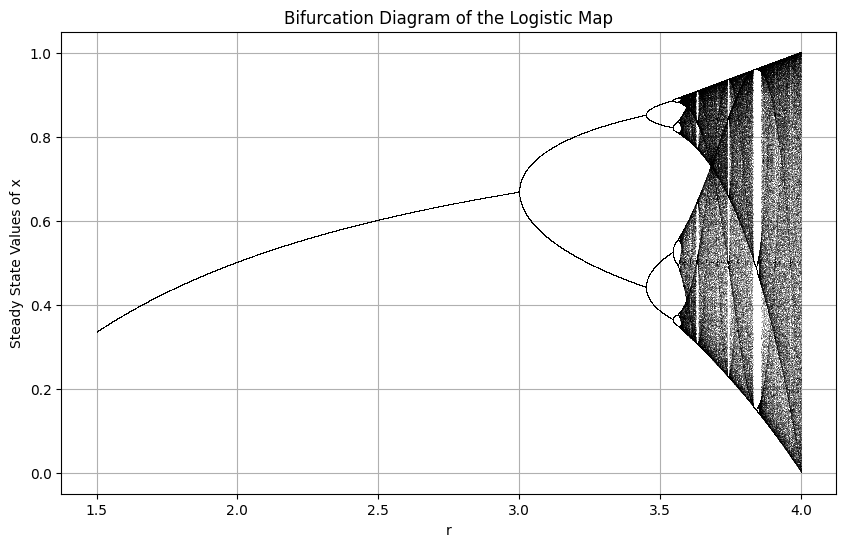

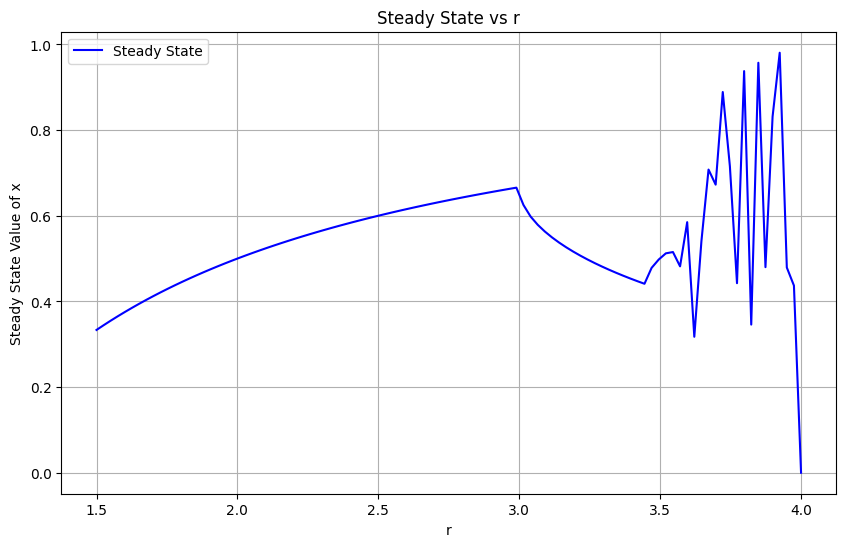

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, r):
    return r * x * (1 - x)

def bifurcation_diagram(r_min=1.5, r_max=4.0, num_r=10000, iterations=1000, last=100):
    # Create an array of r values
    r_values = np.linspace(r_min, r_max, num_r)

    # Prepare plot
    plt.figure(figsize=(10, 6))

    # For each r value, iterate the logistic map
    for r in r_values:
        x = 0.5  # initial condition

        # Run iterations to reach steady state
        for _ in range(iterations):
            x = logistic_map(x, r)

        # After reaching steady state, plot the last few iterations
        x_values = []
        for _ in range(last):
            x = logistic_map(x, r)
            x_values.append(x)

        plt.plot([r] * last, x_values, ',k', alpha=0.25)

    plt.title("Bifurcation Diagram of the Logistic Map")
    plt.xlabel("r")
    plt.ylabel("Steady State Values of x")
    plt.grid(True)
    plt.show()

def steady_state_vs_r(r_min=1.5, r_max=4.0, num_r=100):
    # Create an array of r values
    r_values = np.linspace(r_min, r_max, num_r)
    steady_states = []

    # Calculate the steady state for each r value
    for r in r_values:
        x = 0.5  # initial condition
        # Run iterations to reach steady state
        for _ in range(1000):
            x = logistic_map(x, r)
        steady_states.append(x)

    # Plot steady state vs r
    plt.figure(figsize=(10, 6))
    plt.plot(r_values, steady_states, '-b', label="Steady State")
    plt.title("Steady State vs r")
    plt.xlabel("r")
    plt.ylabel("Steady State Value of x")
    plt.grid(True)
    plt.legend()
    plt.show()

# Generate both plots
bifurcation_diagram()
steady_state_vs_r()


CML equation

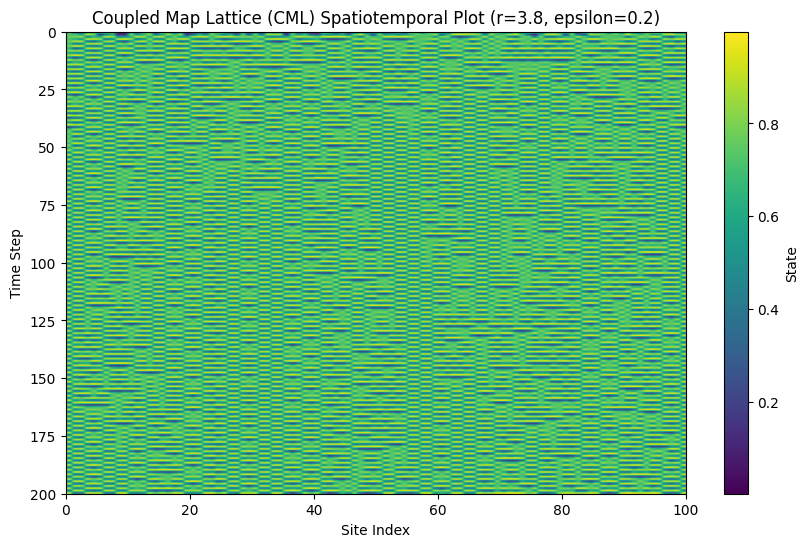

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, r):
    return r * x * (1 - x)

def simulate_cml(N=100, T=100, r=3.8, epsilon=0.2):
    # Initialize lattice with random values
    lattice = np.random.rand(N)
    lattice_history = np.zeros((T, N))

    # Time evolution
    for t in range(T):
        lattice_history[t, :] = lattice
        new_lattice = np.zeros(N)

        # Update each site based on CML equation
        for i in range(N):
            left_neighbor = lattice[i-1] if i > 0 else lattice[N-1] # periodic boundary
            right_neighbor = lattice[(i+1) % N]  # periodic boundary
            new_lattice[i] = (1 - epsilon) * logistic_map(lattice[i], r) + \
                             (epsilon / 2) * (logistic_map(left_neighbor, r) + logistic_map(right_neighbor, r))

        lattice = new_lattice

    return lattice_history

# Parameters
N = 100  # Number of sites
T = 200  # Number of time steps
r = 3.8  # Logistic map parameter
epsilon = 0.2  # Coupling strength

# Run the simulation
cml_result = simulate_cml(N, T, r, epsilon)

# Plot the spatiotemporal evolution
plt.figure(figsize=(10, 6))
plt.imshow(cml_result, cmap='viridis', aspect='auto', extent=[0, N, T, 0])
plt.colorbar(label='State')
plt.title('Coupled Map Lattice (CML) Spatiotemporal Plot (r=3.8, epsilon=0.2)')
plt.xlabel('Site Index')
plt.ylabel('Time Step')
plt.show()


# Coupled Map Lattice with Regular Time and Regular space (Strong Coupling)

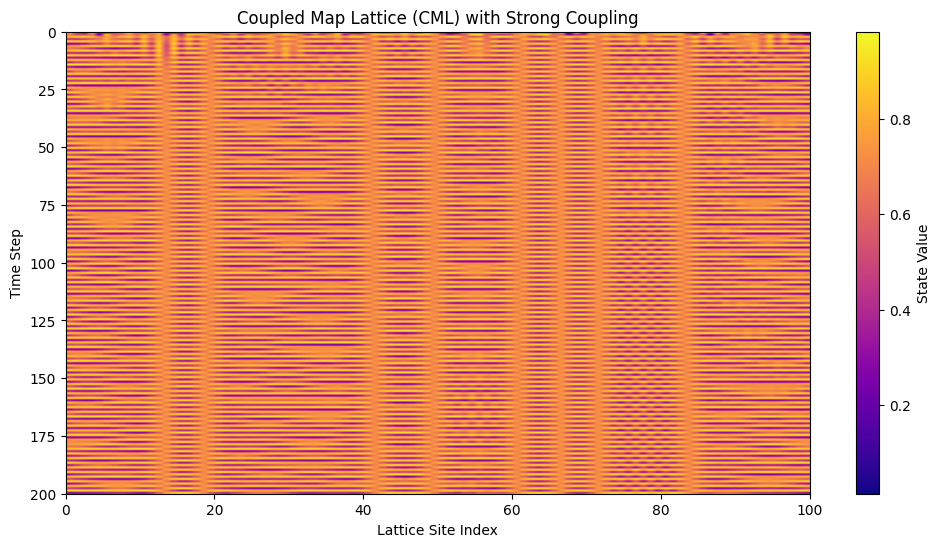

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, r):
    """Logistic map function."""
    return r * x * (1 - x)

def simulate_cml(N=100, T=200, r=3.7, epsilon=0.9):
    """
    Simulate a Coupled Map Lattice (CML) with strong coupling.

    Parameters:
    - N: Number of lattice sites (space)
    - T: Number of time steps
    - r: Logistic map parameter
    - epsilon: Coupling strength

    Returns:
    - lattice_history: 2D array of shape (T, N) representing the evolution over time
    """
    # Initialize the lattice with random values between 0 and 1
    lattice = np.random.rand(N)
    lattice_history = np.zeros((T, N))

    # Time evolution of the lattice
    for t in range(T):
        lattice_history[t, :] = lattice
        new_lattice = np.zeros(N)

        # Update each site based on the CML equation
        for i in range(N):
            left_neighbor = lattice[i-1] if i > 0 else lattice[N-1]  # Periodic boundary condition
            right_neighbor = lattice[(i+1) % N]  # Periodic boundary condition

            # CML equation with strong coupling
            new_lattice[i] = (1 - epsilon) * logistic_map(lattice[i], r) + \
                             (epsilon / 2) * (logistic_map(left_neighbor, r) + logistic_map(right_neighbor, r))

        # Update the lattice for the next time step
        lattice = new_lattice

    return lattice_history

# Parameters
N = 100        # Number of lattice sites (space dimension)
T = 200        # Number of time steps (temporal dimension)
r = 3.7        # Parameter for the logistic map (chaotic region)
epsilon = 0.9  # Strong coupling strength

# Run the simulation
cml_result = simulate_cml(N, T, r, epsilon)

# Plot the spatiotemporal evolution
plt.figure(figsize=(12, 6))
plt.imshow(cml_result, cmap='plasma', aspect='auto', extent=[0, N, T, 0])
plt.colorbar(label='State Value')
plt.title('Coupled Map Lattice (CML) with Strong Coupling')
plt.xlabel('Lattice Site Index')
plt.ylabel('Time Step')
plt.grid(False)
plt.show()


# CML with Irregular Space and Irregular time (Weak Coupling)

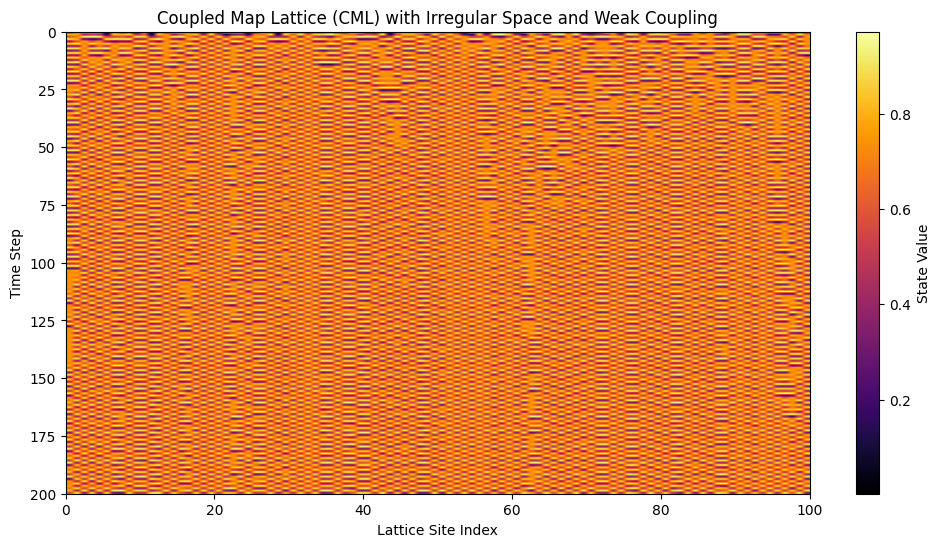

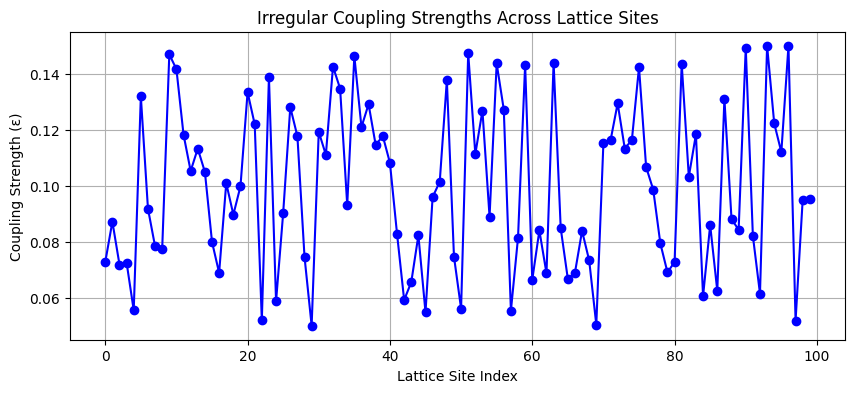

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, r):
    """Logistic map function."""
    return r * x * (1 - x)

def simulate_irregular_cml(N=100, T=200, r=3.8, epsilon_min=0.05, epsilon_max=0.15):
    """
    Simulate a Coupled Map Lattice (CML) with weak coupling and irregular space.

    Parameters:
    - N: Number of lattice sites (space)
    - T: Number of time steps
    - r: Logistic map parameter
    - epsilon_min: Minimum coupling strength
    - epsilon_max: Maximum coupling strength

    Returns:
    - lattice_history: 2D array of shape (T, N) representing the evolution over time
    """
    # Initialize the lattice with random values between 0 and 1
    lattice = np.random.rand(N)
    lattice_history = np.zeros((T, N))

    # Generate irregular coupling strengths for each site
    epsilon_values = np.random.uniform(epsilon_min, epsilon_max, N)

    # Time evolution of the lattice
    for t in range(T):
        lattice_history[t, :] = lattice
        new_lattice = np.zeros(N)

        # Update each site based on the CML equation with irregular coupling
        for i in range(N):
            left_neighbor = lattice[i-1] if i > 0 else lattice[N-1]  # Periodic boundary condition
            right_neighbor = lattice[(i+1) % N]  # Periodic boundary condition
            epsilon = epsilon_values[i]

            # CML equation with site-specific weak coupling
            new_lattice[i] = (1 - epsilon) * logistic_map(lattice[i], r) + \
                             (epsilon / 2) * (logistic_map(left_neighbor, r) + logistic_map(right_neighbor, r))

        # Update the lattice for the next time step
        lattice = new_lattice

    return lattice_history, epsilon_values

# Parameters
N = 100        # Number of lattice sites (space dimension)
T = 200        # Number of time steps (temporal dimension)
r = 3.8        # Parameter for the logistic map (chaotic region)
epsilon_min = 0.05  # Minimum coupling strength (weak coupling)
epsilon_max = 0.15  # Maximum coupling strength (weak coupling)

# Run the simulation
cml_result, epsilon_values = simulate_irregular_cml(N, T, r, epsilon_min, epsilon_max)

# Plot the spatiotemporal evolution
plt.figure(figsize=(12, 6))
plt.imshow(cml_result, cmap='inferno', aspect='auto', extent=[0, N, T, 0])
plt.colorbar(label='State Value')
plt.title('Coupled Map Lattice (CML) with Irregular Space and Weak Coupling')
plt.xlabel('Lattice Site Index')
plt.ylabel('Time Step')
plt.grid(False)
plt.show()

# Plot the coupling strengths to visualize irregular space
plt.figure(figsize=(10, 4))
plt.plot(epsilon_values, '-o', color='blue')
plt.title('Irregular Coupling Strengths Across Lattice Sites')
plt.xlabel('Lattice Site Index')
plt.ylabel('Coupling Strength (ε)')
plt.grid(True)
plt.show()


# CML with Irregular time and regular space

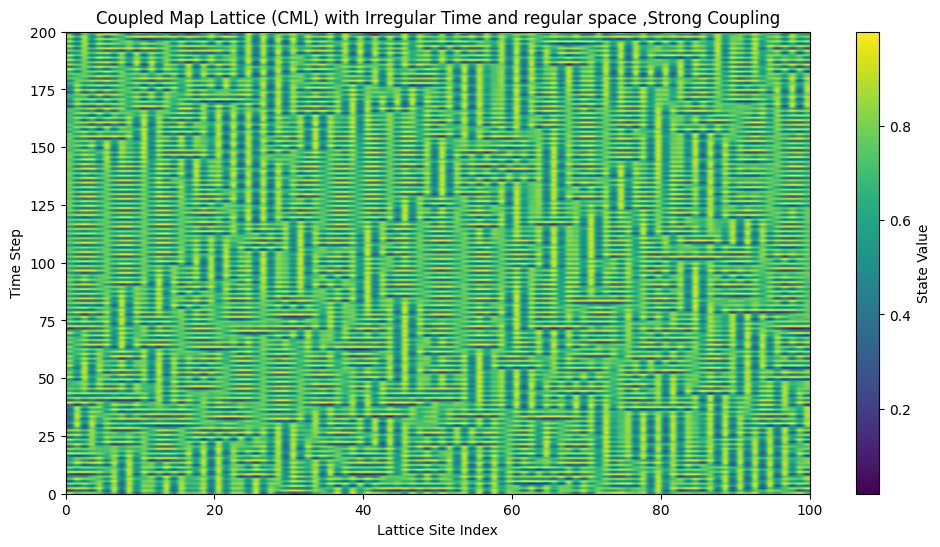

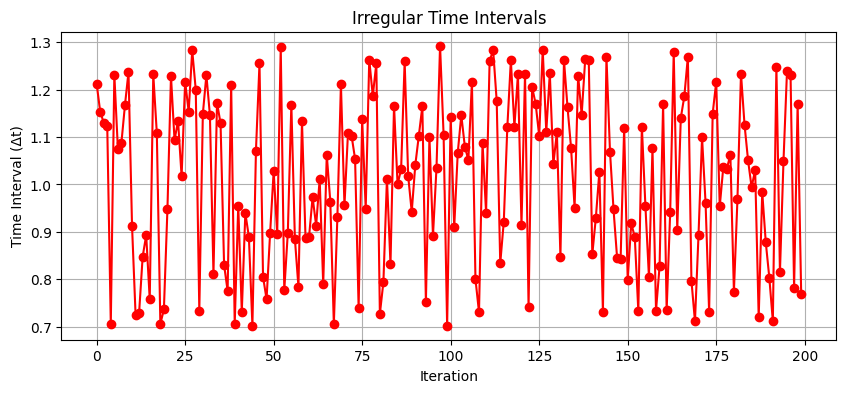

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, r):
    """Logistic map function."""
    return r * x * (1 - x)

def simulate_irregular_time_cml(N=100, max_T=200, r=3.9, epsilon=0.85, time_variability=0.3):
    """
    Simulate a Coupled Map Lattice (CML) with irregular time intervals and strong coupling.

    Parameters:
    - N: Number of lattice sites (space)
    - max_T: Maximum number of time steps
    - r: Logistic map parameter
    - epsilon: Strong coupling strength
    - time_variability: Variability factor for irregular time intervals (0 means regular intervals)

    Returns:
    - lattice_history: 2D array of shape (T, N) representing the evolution over time
    - time_intervals: List of time intervals used for each step
    """
    # Initialize the lattice with random values between 0 and 1
    lattice = np.random.rand(N)
    lattice_history = []
    time_intervals = []

    # Time evolution with irregular time steps
    for t in range(max_T):
        lattice_history.append(lattice.copy())

        # Generate irregular time intervals
        delta_t = 1 + np.random.uniform(-time_variability, time_variability)
        time_intervals.append(delta_t)

        new_lattice = np.zeros(N)

        # Update each site based on the CML equation with strong coupling
        for i in range(N):
            left_neighbor = lattice[i-1] if i > 0 else lattice[N-1]  # Periodic boundary condition
            right_neighbor = lattice[(i+1) % N]  # Periodic boundary condition

            # CML equation with strong coupling
            new_lattice[i] = (1 - epsilon) * logistic_map(lattice[i], r) + \
                             (epsilon / 2) * (logistic_map(left_neighbor, r) + logistic_map(right_neighbor, r))

        # Update the lattice for the next irregular time step
        lattice = new_lattice

    return np.array(lattice_history), time_intervals

# Parameters
N = 100        # Number of lattice sites (space dimension)
max_T = 200    # Maximum number of time steps (temporal dimension)
r = 3.9        # Parameter for the logistic map (chaotic region)
epsilon = 0.95 # Strong coupling strength
time_variability = 0.3  # Factor to control irregularity in time intervals

# Run the simulation
cml_result, time_intervals = simulate_irregular_time_cml(N, max_T, r, epsilon, time_variability)

# Plot the spatiotemporal evolution
plt.figure(figsize=(12, 6))
plt.imshow(cml_result, cmap='viridis', aspect='auto', extent=[0, N, 0, max_T])
plt.colorbar(label='State Value')
plt.title('Coupled Map Lattice (CML) with Irregular Time and regular space ,Strong Coupling')
plt.xlabel('Lattice Site Index')
plt.ylabel('Time Step')
plt.grid(False)
plt.show()

# Plot the time intervals to visualize irregularity
plt.figure(figsize=(10, 4))
plt.plot(time_intervals, '-o', color='red')
plt.title('Irregular Time Intervals')
plt.xlabel('Iteration')
plt.ylabel('Time Interval (Δt)')
plt.grid(True)
plt.show()


# CML with Irregular time and irregular space

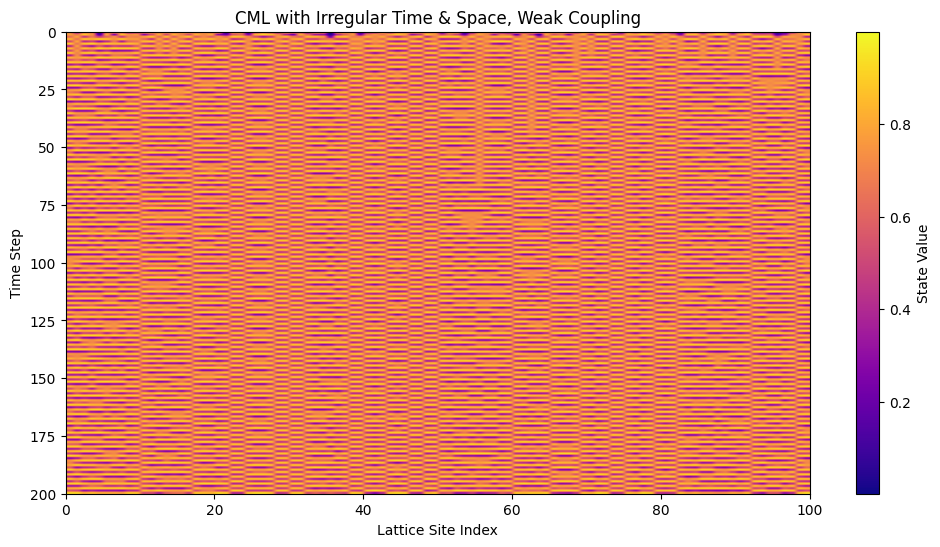

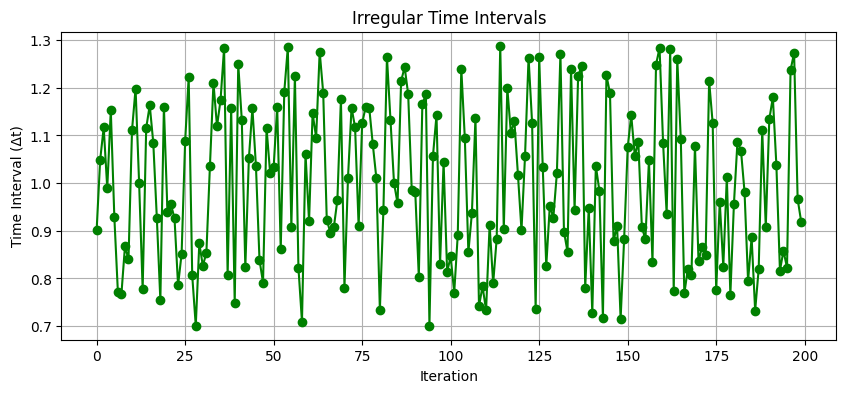

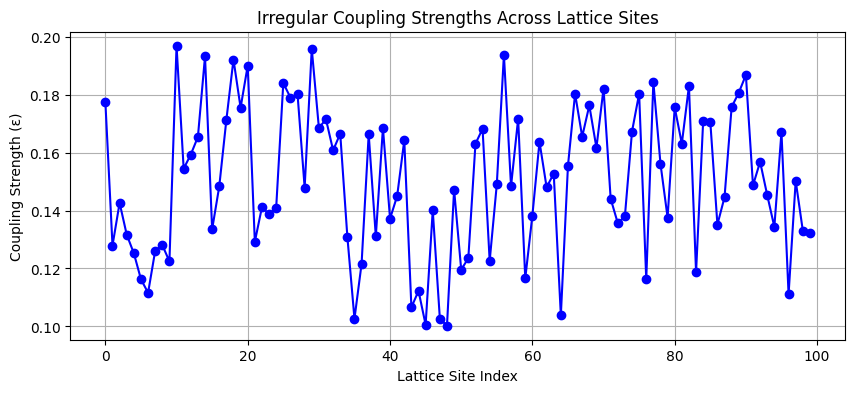

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, r):
    """Logistic map function."""
    return r * x * (1 - x)

def simulate_cml_irregular_time_space(N=100, max_T=200, r=3.7, epsilon_min=0.02, epsilon_max=0.1, time_variability=0.3):
    """
    Simulate a Coupled Map Lattice (CML) with irregular time intervals and irregular space with weak coupling.

    Parameters:
    - N: Number of lattice sites (space)
    - max_T: Maximum number of time steps
    - r: Logistic map parameter
    - epsilon_min: Minimum coupling strength (weak coupling)
    - epsilon_max: Maximum coupling strength (weak coupling)
    - time_variability: Variability factor for irregular time intervals (0 means regular intervals)

    Returns:
    - lattice_history: 2D array of shape (T, N) representing the evolution over time
    - time_intervals: List of time intervals used for each step
    - epsilon_values: Array of coupling strengths for each site
    """
    # Initialize the lattice with random values between 0 and 1
    lattice = np.random.rand(N)
    lattice_history = []
    time_intervals = []

    # Generate irregular coupling strengths for each site
    epsilon_values = np.random.uniform(epsilon_min, epsilon_max, N)

    # Time evolution with irregular time steps
    for t in range(max_T):
        lattice_history.append(lattice.copy())

        # Generate irregular time intervals
        delta_t = 1 + np.random.uniform(-time_variability, time_variability)
        time_intervals.append(delta_t)

        new_lattice = np.zeros(N)

        # Update each site based on the CML equation with irregular coupling and weak interaction
        for i in range(N):
            left_neighbor = lattice[i-1] if i > 0 else lattice[N-1]  # Periodic boundary condition
            right_neighbor = lattice[(i+1) % N]  # Periodic boundary condition
            epsilon = epsilon_values[i]

            # CML equation with site-specific weak coupling
            new_lattice[i] = (1 - epsilon) * logistic_map(lattice[i], r) + \
                             (epsilon / 2) * (logistic_map(left_neighbor, r) + logistic_map(right_neighbor, r))

        # Update the lattice for the next irregular time step
        lattice = new_lattice

    return np.array(lattice_history), time_intervals, epsilon_values

# Parameters
N = 100          # Number of lattice sites (space dimension)
max_T = 200      # Maximum number of time steps (temporal dimension)
r = 3.7          # Parameter for the logistic map (chaotic region)
epsilon_min = 0.2  # Minimum coupling strength (weak coupling)
time_variability = 0.3  # Factor to control irregularity in time intervals

# Run the simulation
cml_result, time_intervals, epsilon_values = simulate_cml_irregular_time_space(
    N, max_T, r, epsilon_min, epsilon_max, time_variability
)

# Plot the spatiotemporal evolution
plt.figure(figsize=(12, 6))
plt.imshow(cml_result, cmap='plasma', aspect='auto', extent=[0, N, max_T, 0])
plt.colorbar(label='State Value')
plt.title('CML with Irregular Time & Space, Weak Coupling')
plt.xlabel('Lattice Site Index')
plt.ylabel('Time Step')
plt.grid(False)
plt.show()

# Plot the irregular time intervals
plt.figure(figsize=(10, 4))
plt.plot(time_intervals, '-o', color='green')
plt.title('Irregular Time Intervals')
plt.xlabel('Iteration')
plt.ylabel('Time Interval (Δt)')
plt.grid(True)
plt.show()

# Plot the coupling strengths to visualize irregular space
plt.figure(figsize=(10, 4))
plt.plot(epsilon_values, '-o', color='blue')
plt.title('Irregular Coupling Strengths Across Lattice Sites')
plt.xlabel('Lattice Site Index')
plt.ylabel('Coupling Strength (ε)')
plt.grid(True)
plt.show()


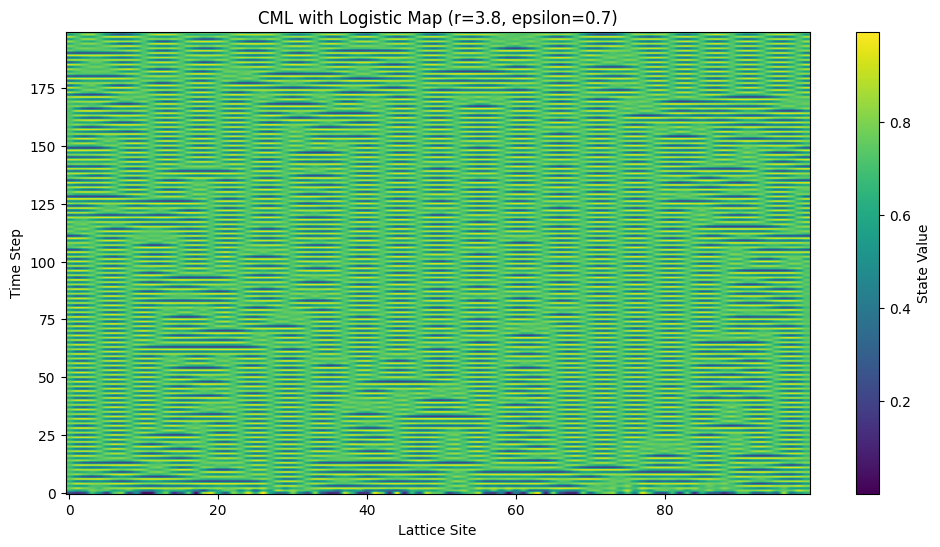

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, r):
    """Logistic map function."""
    return r * x * (1 - x)

def simulate_cml(N, T, r, epsilon):
    """
    Simulate a 1D Coupled Map Lattice with the logistic map.

    Parameters:
    - N: Number of lattice sites.
    - T: Number of time steps.
    - r: Parameter of the logistic map.
    - epsilon: Coupling strength.

    Returns:
    - A 2D array of shape (T, N) representing the state of the lattice over time.
    """
    # Initialize the lattice with random values between 0 and 1
    lattice = np.random.rand(N)

    # Create an array to store the lattice states over time
    states = np.zeros((T, N))

    for t in range(T):
        # Store the current state
        states[t] = lattice

        # Apply the CML equation with periodic boundary conditions
        new_lattice = np.zeros(N)
        for i in range(N):
            left = lattice[i-1] if i > 0 else lattice[-1]  # Left neighbor
            right = lattice[(i+1) % N]                    # Right neighbor
            new_lattice[i] = (1 - epsilon) * logistic_map(lattice[i], r) + \
                             (epsilon / 2) * (logistic_map(left, r) + logistic_map(right, r))

        # Update lattice state
        lattice = new_lattice

    return states

# Parameters
N = 100          # Number of lattice sites
T = 200          # Number of time steps
r = 3.8         # Parameter of the logistic map (commonly chaotic for r > 3.57)
epsilon = 0.7    # Coupling strength

# Run the simulation
states = simulate_cml(N, T, r, epsilon)

# Visualization
plt.figure(figsize=(12, 6))
plt.imshow(states, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='State Value')
plt.xlabel('Lattice Site')
plt.ylabel('Time Step')
plt.title(f'CML with Logistic Map (r={r}, epsilon={epsilon})')
plt.show()


# Spatiotemporal chaos in Coupled Map Lattice

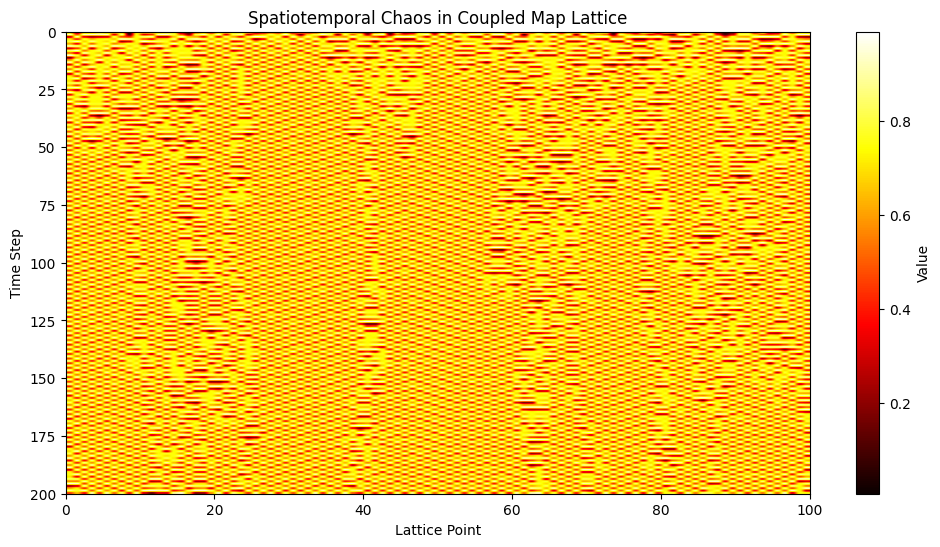

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of lattice points
T = 200  # Number of time steps
r = 3.9  # Parameter for the logistic map
epsilon = 0.1  # Coupling strength

# Initialize the lattice with random values between 0 and 1
lattice = np.random.rand(N)

# Logistic map function
def logistic_map(x, r):
    return r * x * (1 - x)

# Create an array to store the evolution of the lattice
history = np.zeros((T, N))

# Time evolution of the coupled map lattice
for t in range(T):
    history[t] = lattice.copy()  # Store the current state

    # Update each point in the lattice
    new_lattice = np.zeros(N)
    for i in range(N):
        # Neighbors (periodic boundary conditions)
        left_neighbor = lattice[(i - 1) % N]
        right_neighbor = lattice[(i + 1) % N]

        # Apply the CML update rule
        new_lattice[i] = (1 - epsilon) * logistic_map(lattice[i], r) + \
                         (epsilon / 2) * (logistic_map(left_neighbor, r) + logistic_map(right_neighbor, r))

    lattice = new_lattice

# Plotting the results
plt.figure(figsize=(12, 6))
plt.imshow(history, aspect='auto', cmap='hot', extent=[0, N, T, 0])
plt.colorbar(label='Value')
plt.title('Spatiotemporal Chaos in Coupled Map Lattice')
plt.xlabel('Lattice Point')
plt.ylabel('Time Step')
plt.show()
